In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

np.random.seed(0)

In [3]:
from utils import BFSScraper, CustomStemmer, BubbleChart, Ranker, User # Code written by us it is documented in file ranker.py

### Downloading documents from Wikipedia
Starting from the `Jazz` page

In [36]:
bfs_scrap = BFSScraper(n_to_visit=10)
bfs_scrap.bfs('https://en.wikipedia.org/wiki/Jazz', 100)

100 sites already collected: : 102it [03:59,  2.35s/it]


In [37]:
bfs_scrap.generate_summary() # Generate summary that shows how wikipedia was traversed by scraper

In [38]:
bfs_scrap.generate_csv() # Generate csv with scraped data

### Preprocessing data

In [39]:
texts = pd.read_csv('text.csv', index_col=0).T
texts.head()

,content,num_of_links,selected_links
https://en.wikipedia.org/wiki/Jazz,\nJazz is a music genre that originated in the...,863,"['https://en.wikipedia.org/wiki/Buddy_Bolden',..."
https://en.wikipedia.org/wiki/Buddy_Bolden,"\nCharles Joseph ""Buddy"" Bolden (September 6, ...",57,['https://en.wikipedia.org/wiki/Dementia_praec...
https://en.wikipedia.org/wiki/Cobblestone_Records,Cobblestone Records was an American jazz recor...,211,['https://en.wikipedia.org/wiki/1950s_in_jazz'...
https://en.wikipedia.org/wiki/Wild_Bill_Davison,"William Edward Davison (January 5, 1906 – Nove...",25,['https://en.wikipedia.org/wiki/Humphrey_Lytte...
https://en.wikipedia.org/wiki/German_jazz,An overview of the evolution of Jazz music in ...,353,['https://en.wikipedia.org/wiki/Orchestral_jaz...


In [40]:
stemmer = CustomStemmer()
preprocessed = stemmer.process_corpus(texts)

In [41]:
stemmer.generate_csv(preprocessed)

All files available [here](https://drive.google.com/drive/folders/1FkuFF7tCvBj8pTVDtOtFXtfSUOH7a2vw?usp=sharing), as git doesn't support so large files 

## Visualization of data

Violing showing distribution of number of links on wikipedia pages. We can clearly see that most pages have rather small amount of links, but some have enourmous.

We've additionally plotted all points so that you can hover on it and see which page has how many links.

In [51]:
texts_reset_id = texts.reset_index().astype({"num_of_links": "int32"})
px.violin(texts_reset_id, 
          x="num_of_links", 
          title="Distribution of number of links on wikiedia starting traversal from Jazz",
          labels= {"num_of_links": "Number of links on a page"},
          points='all',
          hover_data=["index"])

In [52]:
data = pd.read_csv('processed.csv', index_col=0)
data.head()

,text
https://en.wikipedia.org/wiki/Jazz,Jazz music genre originated communities New Or...
https://en.wikipedia.org/wiki/Buddy_Bolden,Charles Joseph Buddy Bolden September November...
https://en.wikipedia.org/wiki/Cobblestone_Records,Cobblestone Records American jazz record label...
https://en.wikipedia.org/wiki/Wild_Bill_Davison,William Edward Davison January November nickna...
https://en.wikipedia.org/wiki/German_jazz,An overview evolution Jazz music Germany revea...


In [10]:
words = [text.split() for text in data['text']]
words = [
    word for document in words for word in document]


Top 10 most occured words

In [11]:
from collections import Counter

counter = Counter(words)
cols = [x[0].lower() for x in counter.most_common(10)]
for pair in counter.most_common(10):
    print(f'{pair[0]}: {pair[1]}')

jazz: 358
music: 140
The: 118
In: 90
musicians: 73
New: 68
Jazz: 59
Marsalis: 48
first: 44
Orleans: 41


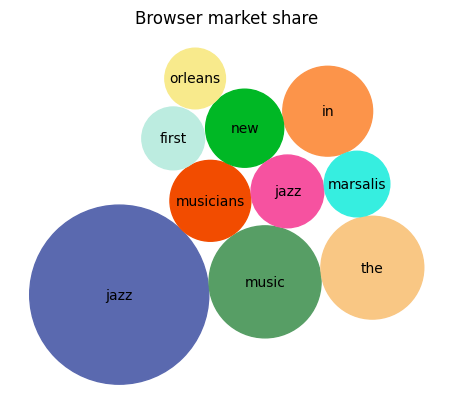

In [12]:
bubble_chart = BubbleChart(area=[x[1] for x in counter.most_common(10)],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
colors = ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825',
          '#F652A0', '#36EEE0', '#BCECE0', '#F8EA8C']
bubble_chart.plot(
    ax, cols, colors)
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Browser market share')

plt.show()


Co-occurances

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

CountVec = CountVectorizer()
CountData = CountVec.fit_transform(data['text'])
 
wordsM = (CountData.T)@CountData

In [23]:
df = pd.DataFrame(wordsM.toarray(),
                  columns=CountVec.get_feature_names_out(), index=CountVec.get_feature_names_out())
df.head()

,aaron,abandoned,abandoning,abandonment,abbey,abercrombie,ability,able,abolition,abound,...,young,younger,youngest,your,youtube,zappa,zarin,zawinul,zbigniew,zorn
aaron,1,4,3,1,1,1,2,7,1,1,...,16,6,0,1,1,2,0,3,1,1
abandoned,4,16,12,4,4,4,8,28,4,4,...,64,24,0,4,4,8,0,12,4,4
abandoning,3,12,9,3,3,3,6,21,3,3,...,48,18,0,3,3,6,0,9,3,3
abandonment,1,4,3,1,1,1,2,7,1,1,...,16,6,0,1,1,2,0,3,1,1
abbey,1,4,3,1,1,1,2,7,1,1,...,16,6,0,1,1,2,0,3,1,1


Biggest number of co-occurance

In [24]:
a = wordsM.copy()
for i in range(a.shape[0]):
    a[i,i] = -1
x, y = np.unravel_index(a.argmax(), a.shape)
print(f'The most co-occurances are: {CountVec.get_feature_names_out()[x]}, {CountVec.get_feature_names_out()[y]} with a value of {a[x,y]}')


The most co-occurances are: music, jazz with a value of 51845


In [16]:
import networkx as nx
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import nxviz as nv
from nxviz import annotate


d:\polibuda\sem5\IR\WikipediaRecommender\.venv\lib\site-packages\nxviz\__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


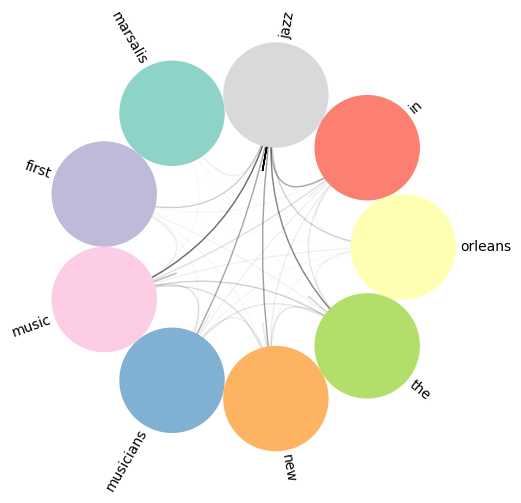

In [17]:
top = df[cols].loc[cols]
G = nx.from_numpy_array(top.values)
mapping = {x: cols[x] for x in range(len(cols))}
G = nx.relabel_nodes(G, mapping)

for v, name in zip(G, cols):
    G.nodes[v]["class"] = G.degree(v, weight="weight")
    G.nodes[v]["name"] = name

ax = nv.circos(
    G,
    node_color_by="class",
    edge_alpha_by="weight",
    group_by="name",
)

ax.figure.tight_layout()
annotate.circos_labels(G, group_by="name", layout="rotate")


## Rank

In [4]:
ranker = Ranker('processed.csv', pca_components=50)

In [58]:
sebastian = User()

In [63]:
ranker.rank_based_on_link(sebastian, "https://en.wikipedia.org/wiki/Institute_of_Jazz_Studies", model="tfidf")

https://en.wikipedia.org/wiki/Jazz, score: 0.36457809612122727
https://en.wikipedia.org/wiki/German_jazz, score: 0.3548070856346116
https://en.wikipedia.org/wiki/Belgian_jazz, score: 0.3063679521950333
https://en.wikipedia.org/wiki/Jazz_fusion, score: 0.2522706340509253
https://en.wikipedia.org/wiki/Orchestral_jazz, score: 0.24411257421934973
https://en.wikipedia.org/wiki/Dutch_jazz, score: 0.23619573910487413
https://en.wikipedia.org/wiki/1950s_in_jazz, score: 0.22809707464776074
https://en.wikipedia.org/wiki/Mainstream_jazz, score: 0.21137367020267517
https://en.wikipedia.org/wiki/Danish_jazz, score: 0.20916052700887966
https://en.wikipedia.org/wiki/List_of_soul_jazz_musicians, score: 0.19598055229841793


In [44]:
sebastian.viewed_links

{'https://en.wikipedia.org/wiki/Big_band',
 'https://en.wikipedia.org/wiki/Blues',
 'https://en.wikipedia.org/wiki/Danish_jazz',
 'https://en.wikipedia.org/wiki/Institute_of_Jazz_Studies',
 'https://en.wikipedia.org/wiki/Jazz'}

In [48]:
ranker.recommend_based_on_history(sebastian, model="tfidf")

https://en.wikipedia.org/wiki/German_jazz, score: 0.3786
https://en.wikipedia.org/wiki/Belgian_jazz, score: 0.3561
https://en.wikipedia.org/wiki/Orchestral_jazz, score: 0.3354
https://en.wikipedia.org/wiki/Jazz_fusion, score: 0.324
https://en.wikipedia.org/wiki/1950s_in_jazz, score: 0.2942
https://en.wikipedia.org/wiki/Mainstream_jazz, score: 0.2505
https://en.wikipedia.org/wiki/Dutch_jazz, score: 0.2493
https://en.wikipedia.org/wiki/List_of_soul_jazz_musicians, score: 0.1828
https://en.wikipedia.org/wiki/Miles_Davis, score: 0.1793
https://en.wikipedia.org/wiki/Folk_jazz, score: 0.1777


Add links handling, and the explanatory part

In [128]:
ranker.explain_similarity("https://en.wikipedia.org/wiki/Dutch_jazz","https://en.wikipedia.org/wiki/Institute_of_Jazz_Studies")

0.2361957391048741
